<a href="https://colab.research.google.com/github/SIESOBOT/DS-Unit-1-Sprint-2-Statistics/blob/master/DS13%20UNIT%201%20SC2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 2

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 is a variable that indicates whether or not a person's request for credit has been approved or denied. This is a good candidate for a y variable since we might want to use the other features to predict this one. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [0]:
# had to call the atribute in pd readcsv index col false to fix the df display
import pandas as pd 
import numpy as np
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data',names=['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11',
                                                                                                              'A12','A13','A14','A15','A16'],index_col=False)
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [0]:
df.tail()
#dataframe looking good so far!

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-
689,b,35.00,3.375,u,g,c,h,8.29,f,f,0,t,g,00000,0,-


In [0]:
#checking for null values
df.isnull().sum()
#looks like there is no missing values as na or NaN

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

In [0]:
df.replace(to_replace='?',value=np.nan,inplace=True)
df.replace(to_replace={'+':1,'-':0},inplace=True)
df.A1.replace(to_replace={'a':1,'b':0,},inplace=True)
df.A9.replace({'t':1,'f':0},inplace=True)
df.A10.replace({'t':1,'f':0}, inplace=True)

In [0]:
#checking data types
df.dtypes

A1      object
A2      object
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14     object
A15      int64
A16      int64
dtype: object

In [0]:
df['A14'][2]

'00280'

In [0]:
#had to change each column manually since the astype function will not change
#all columns with a dictionary as the documentation says it does
df['A2'] = df['A2'].astype(float)
df['A3'] = df['A3'].astype(float)
df['A8'] = df['A8'].astype(float)
df['A11'] = df['A11'].astype(float)
df['A14'] = df['A14'].astype(float)
df['A15'] = df['A15'].astype(float)
df['A16'] =df['A16'].astype(int)

In [0]:


print(df.dtypes)


A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11    float64
A12     object
A13     object
A14    float64
A15    float64
A16      int64
dtype: object


## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [0]:
# TODO
df.describe()


,A2,A3,A8,A11,A14,A15,A16
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507,0.444928
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598,0.497318
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000,0.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000,1.000000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000,1.000000


In [0]:
approved = df[df['A16'] == 1]
denied = df[df['A16']==0]
#the dataframe here is separated by approved and denied credit lines






In [0]:
from scipy import stats

#null hipotesis: denied and approved classes have the same a14
#feature ttest result
#alternative: the approved and denied features have different ttest results for
#feature A14, confidence 95

stats.ttest_ind(approved['A14'],denied['A14'],nan_policy='omit')

Ttest_indResult(statistic=-2.6358251986645476, pvalue=0.008586135473979569)

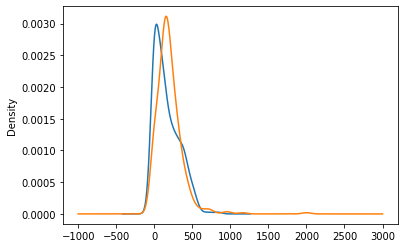

In [0]:
approved['A14'].plot.density()
denied['A14'].plot.density();

In [0]:
#null hipothesis: the A3 feature has the same distributions on both classes
#alternative hipothesis: the a3 feature has uneven distribution on both classes
stats.ttest_ind(approved['A3'],denied['A3'],nan_policy='omit')

Ttest_indResult(statistic=5.52998337614816, pvalue=4.551680702308068e-08)

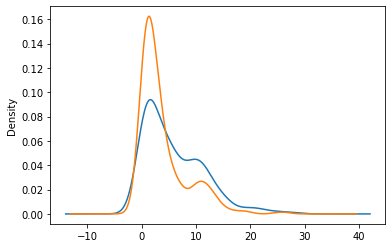

In [0]:
approved['A3'].plot.density()
denied['A3'].plot.density();

In [0]:
#defining the crosstab for approved credit lines 
cross = pd.crosstab(approved['A1'],approved['A10'],margins=True)

cross

A10,0,1,All
A1,,,
0.0,69,137,206
1.0,29,69,98
All,98,206,304


In [0]:
#defining the crosstab for denid credit lines
cross2 = pd.crosstab(denied['A1'],denied['A10'],margins=True)
cross2

A10,0,1,All
A1,,,
0.0,209,53,262
1.0,79,33,112
All,288,86,374


In [0]:
#chi^2 test for aproved credit lines
stats.chi2_contingency(cross)

(0.4631689383515962,
 0.9769860138268417,
 4,
 array([[ 66.40789474, 139.59210526, 206.        ],
        [ 31.59210526,  66.40789474,  98.        ],
        [ 98.        , 206.        , 304.        ]]))

In [0]:
#chi^2 test for denied credit lines
stats.chi2_contingency(cross2)

(3.7792004788075655,
 0.436711680211919,
 4,
 array([[201.7540107,  60.2459893, 262.       ],
        [ 86.2459893,  25.7540107, 112.       ],
        [288.       ,  86.       , 374.       ]]))

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

*T TESTING*
- the 1st t-test compared column A14, this test showed a result that the distribution of this variable is not dependent on the approval or denial of a credit line
- the 2nd t-test showed that the A3 column shows that the distribution of this variable IS dependent on the aproval or denial of the credit line

*CHI^2 TESTING*
- the features A1 and A10 are not dependent when a credit line is aproved, as shown in the aproved credit lines testing.
- the features A1 and 10 are dependent when a credit lines are denied, as shown in the denied credit line testing.

*the most challenging part of the assignment*
- changing the continious variables to floats :D

# Stretch Goals: 
Do these to get a 3. These are not required in order to pass the Sprint Challenge.

## Part 1: 

Make sure that all of your dataframe columns have the appropriate data types. *Hint:* If a column has the datatype of "object" even though it's made up of float or integer values, you can coerce it to act as a numeric column by using the `pd.to_numeric()` function. In order to get a 3 on this section make sure that your data exploration is particularly well commented, easy to follow, and thorough.

## Part 2:

Write functions that can calculate t-tests and chi^2 tests on all of the appropriate column combinations from the dataset. (Remember that certain tests require certain variable types.)

## Part 3: 

Calculate and report confidence intervals on your most important mean estimates (choose at least two). Make some kind of a graphic or visualization to help us see visually how precise these estimates are.

In [0]:
# You can work the stretch goals down here or back up in their regular sections
# just make sure that they are labeled so that we can easily differentiate
# your main work from the stretch goals.